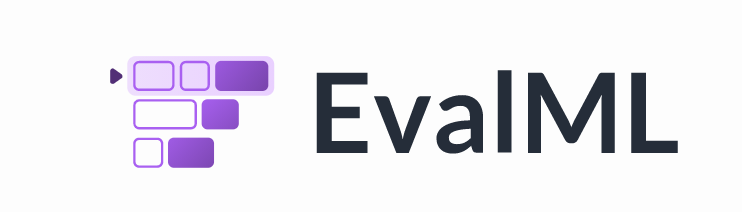

In [3]:
!pip install evalml

^C


In [4]:
!pip install xlrd==1.2.0


  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtale 1.61.1 requires scikit-learn==0.24.2; python_version > "3.0", but you have scikit-learn 0.23.1 which is incompatible.
You should consider upgrading via the 'c:\users\sai sujan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


### Loading The Dataset
- We can also read the dataset from csv
- then convert to datatable

In [6]:
import evalml
df=pd.read_csv("cleaned_data.csv")


AttributeError: module 'pandas' has no attribute 'read_orc'

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\SAI SUJAN\.conda\envs\flight_price_prediction\python.exe' 'C:\Users\SAI SUJAN\.conda\envs\flight_price_prediction\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\SAISUJ~1\AppData\Local\Temp\tmpu_2igeo1'
         cwd: C:\Users\SAISUJ~1\AppData\Local\Temp\pip-install-2qbxp78j\pywinpty_1fa0d286aacc47a0be629dcc1d6b40a3
    Complete output (6 lines):
    
    Cargo, the Rust package manager, is not installed or is not on PATH.
    This package requires Rust and Cargo to compile extensions. Install it through
    the system's package manager or via https://rustup.rs/
    
    Checking for Rust toolchain....
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\SAI SUJAN\.conda\envs\flight_price_prediction\python.exe' 'C:\Users\SAI SUJAN\.conda\envs\flight_price_prediction\lib\site-packages\pip\_

  Using cached evalml-0.43.0-py3-none-any.whl (6.4 MB)
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)
  Using cached category_encoders-2.3.0-py2.py3-none-any.whl (82 kB)
  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)
  Using cached ipywidgets-7.6.5-py2.py3-none-any.whl (121 kB)
  Using cached statsmodels-0.12.2-cp36-none-win_amd64.whl (9.3 MB)
  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)
  Using cached evalml-0.42.0-py3-none-any.whl (6.4 MB)
  Using cached evalml-0.41.0-py3-none-any.whl (6.4 MB)
  Using cached scikit_learn-0.24.2-cp36-cp36m-win_amd64.whl (6.8 MB)
  Using cached requirements_parser-0.5.0-py3-none-any.whl (18 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached evalml-0.40.0-py3-none-any.whl (6.4 MB)
  Using cached psu

In [2]:
!pip install numpy==1.17.3


  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.16.4.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df['Price']
dd=df.copy


In [13]:
y=df['Price']

X=df.drop(['Price'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='Regression')
automl.search()

ValueError: StringArray requires a sequence of strings or pandas.NA

In [27]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"],return_dict=True)


*******************************************************
* Random Forest Classifier w/ Label Encoder + Imputer *
*******************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 5.9 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.427       0.425 0.573 0.786      0.531 0.559                     0.720            0.794     16,000        8,000
1                      0.440       0.392 0.532 0.766      0.497 0.536             

{'id': 6,
 'pipeline_name': 'Random Forest Classifier w/ Label Encoder + Imputer',
 'pipeline_class': evalml.pipelines.binary_classification_pipeline.BinaryClassificationPipeline,
 'pipeline_summary': 'Random Forest Classifier w/ Label Encoder + Imputer',
 'parameters': {'Label Encoder': {'positive_label': None},
  'Imputer': {'categorical_impute_strategy': 'most_frequent',
   'numeric_impute_strategy': 'mean',
   'categorical_fill_value': None,
   'numeric_fill_value': None},
  'Random Forest Classifier': {'n_estimators': 100,
   'max_depth': 6,
   'n_jobs': -1}},
 'mean_cv_score': 0.4335320913808866,
 'standard_deviation_cv_score': 0.006820038932763419,
 'high_variance_cv': False,
 'training_time': 5.9275689125061035,
 'cv_data': [{'all_objective_scores': OrderedDict([('Log Loss Binary',
                 0.42679137713874743),
                ('MCC Binary', 0.42542899342994595),
                ('Gini', 0.5726432341227516),
                ('AUC', 0.7863216170613758),
                

In [25]:
col = df.columns

In [26]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

KeyError: "['SalePrice'] not found in axis"

In [13]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')



In [28]:
X_train = pd.DataFrame(X_train,columns=col)
y_train = pd.DataFrame(y_train,columns=col)
X_test = pd.DataFrame(X_test,columns=col)
y_test = pd.DataFrame(y_test,columns=col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: list index out of range

In [29]:
X_train['SalePrice']=y_train['SalePrice']
X_test['SalePrice']=y_test['SalePrice']

KeyError: 'SalePrice'

In [30]:
X_train

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Running the AutoML to select the best algorithm

In [31]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [28]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

In [29]:
df=automl.rankings

In [30]:
df

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.433532,0.006820,0.426791,94.340617,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Imputer,3,0.434122,0.007778,0.426382,94.332913,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,LightGBM Classifier w/ Label Encoder + Imputer,4,0.437074,0.007032,0.430724,94.294378,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,8,Extra Trees Classifier w/ Label Encoder + Imputer,8,0.461704,0.003651,0.457567,93.972863,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.467181,0.003691,0.462927,93.901362,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.467474,0.003495,0.463443,93.897532,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.532221,0.027812,0.511056,93.052315,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.566133,0.000960,0.565447,92.609626,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,7.660413,0.002493,7.658974,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


### Getting The Best Pipeline

In [31]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Random Forest Classifier': ['Random Forest Classifier', 'Imputer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [32]:
best_pipeline=automl.best_pipeline

In [33]:
best_pipeline.describe()


*******************************************************
* Random Forest Classifier w/ Label Encoder + Imputer *
*******************************************************

Problem Type: binary
Model Family: Random Forest
Number of features: 23

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1


### Let's Check the detailed desscription

In [20]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************************
* XGBoost Classifier w/ Label Encoder + Imputer *
*************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 10.4 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.438       0.408 0.538 0.769      0.550 0.535                     0.700            0.800     16,000        8,000
1                      0.429       0.419 0.562

In [21]:
automl.problem_type

<ProblemTypes.BINARY: 'binary'>

In [22]:
### Evaluate on hold out data
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])
#v=best_pipeline.score(X_test, y_test, objectives=["R2","Root Mean Squared Error","MaxError","MedianAE","MSE","MAE"])


OrderedDict([('AUC', 0.777552700170664),
             ('F1', 0.5390570021111892),
             ('Precision', 0.5056105610561056),
             ('Recall', 0.5772418990203466)])

In [ ]:
"""
columns = X_train.columns
columns.append(X_test.columns)
import numpy as np
X_train = np.concatenate((X_train, X_test), axis=0)
"""

In [ ]:
X_test

### We can also optimize for a problem specific objective

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision','auc'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

In [ ]:
automl_auc.rankings

In [41]:
string = automl_auc.rankings['pipeline_name'][0]
filename = string[:string.find('w/')]
type(model_name)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [42]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

IndexError: single positional indexer is out-of-bounds

In [43]:
best_pipeline_auc = automl_auc.best_pipeline

PipelineNotFoundError: automl search must be run before selecting `best_pipeline`.

In [44]:
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

NameError: name 'best_pipeline_auc' is not defined

In [45]:
best_pipeline.save("model.pkl")

#### Loading the Model

In [46]:
check_model=automl.load('model.pkl')

In [47]:

column = X_test.iloc[0].index


In [48]:
column = X_test.iloc[0].index
arr=X_test.iloc[0].values
#create a dataframe
#arr=arr.reshape(1,-1)
df = pd.DataFrame(arr.reshape(1,-1), columns=column)


<IPython.core.display.Javascript object>

In [49]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.9,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,15.14,21.8,101.2,718.9,0.09384,0.2006,0.1384,0.06222,0.2679,0.07698


In [50]:
arr

array([1.390e+01, 1.662e+01, 8.897e+01, 5.994e+02, 6.828e-02, 5.319e-02,
       2.224e-02, 1.339e-02, 1.813e-01, 5.536e-02, 1.555e-01, 5.762e-01,
       1.392e+00, 1.403e+01, 3.308e-03, 1.315e-02, 9.904e-03, 4.832e-03,
       1.316e-02, 2.095e-03, 1.514e+01, 2.180e+01, 1.012e+02, 7.189e+02,
       9.384e-02, 2.006e-01, 1.384e-01, 6.222e-02, 2.679e-01, 7.698e-02])

In [51]:
arr.to_dataframe()

AttributeError: 'numpy.ndarray' object has no attribute 'to_dataframe'

In [ ]:
check_model.predict_proba(X_test)

In [ ]:
check_model.predict_proba(X_test.iloc[0]).to_dataframe()

In [ ]:
check_model.predict_proba(df)